In [1]:
import numpy as np
from scipy.ndimage import uniform_filter1d
from matplotlib import pyplot
from open_atmos_jupyter_utils import show_plot
from PySDM import Formulae
from PySDM.physics import si

from PySDM_examples.expansion_chamber.aerosol import AerosolChamber
from PySDM_examples.expansion_chamber.expansion_simulation import run_expansion

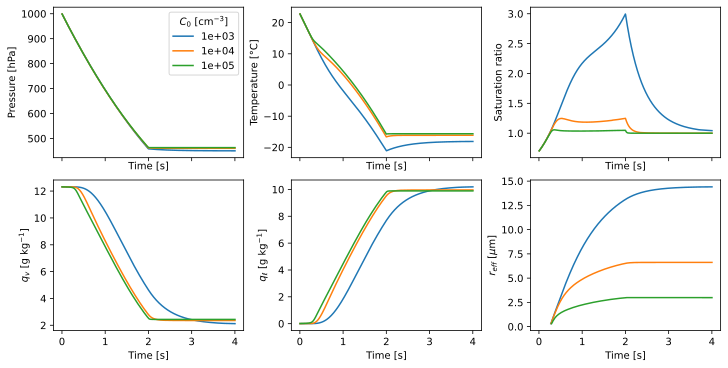

HTML(value="<a href='./C0_sweep_traces.pdf' target='_blank'>./C0_sweep_traces.pdf</a><br>")

In [2]:
n_sd_per_mode = 20

# plot p, T, S, qv, ql, reff
variables = ["p","T","s","water_vapour_mixing_ratio","liquid_water_mixing_ratio","reff"]
offsets = [0, -273.15, 1, 0, 0, 0]
factors = [1/100, 1, 1, 1, 1, 1]
ylabels = ["Pressure [hPa]", "Temperature [°C]", "Saturation ratio", "$q_v$ [g kg$^{-1}$]", "$q_\ell$ [g kg$^{-1}$]", "$r_{eff}$ [$\mu$m]"]
fig,axes=pyplot.subplots(2,3,figsize=(10,5),sharex=True,sharey=False,constrained_layout=True)

for Na in [1e3, 1e4, 1e5]: #[1, 10, 100, 1000, 10000, 100000]:

    formulae = Formulae()
    const = formulae.constants
    aerosol = AerosolChamber(
            water_molar_volume=const.Mv / const.rho_w,
            N=Na / si.cm**3,
        )

    output = run_expansion(formulae, aerosol, n_sd_per_mode, t_max=4*si.s, dz=10*si.m)
    
    for i,ax in enumerate(axes.flatten()):
        y = np.array(output.profile[variables[i]]) * factors[i] + offsets[i]
        ax.plot(output.profile["t"], y, label=f"{Na:.0e}")
        # if i == 2:
        #     ax.set_yscale("log")
        ax.set_xlabel("Time [s]")
        ax.set_ylabel(ylabels[i])

axes[0,0].legend(title="$C_0$ [cm$^{-3}$]")
show_plot("C0_sweep_traces.pdf")

In [3]:
n_sd_per_mode = 20

p0 = 1000 * si.hPa
dp = np.insert(np.linspace(100,600,11),0,1) * si.hPa
Tmin = np.zeros_like(dp)
Smax = np.zeros_like(dp)
Tmin_clean = np.zeros_like(dp)
Smax_clean = np.zeros_like(dp)
Tmin_dry = np.zeros_like(dp)
Smax_dry = np.zeros_like(dp)
for i,dpi in enumerate(dp):
    print(i,dpi)

    formulae = Formulae()
    const = formulae.constants
    aerosol = AerosolChamber(water_molar_volume=const.Mv / const.rho_w, N=2000 / si.cm**3)
    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0.5, p0=p0, pf=(p0 - dpi), dz=10*si.m)
    Tmin[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

    aerosol = AerosolChamber(water_molar_volume=const.Mv / const.rho_w, N=1 / si.cm**3)
    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0.5, p0=p0, pf=(p0 - dpi), dz=10*si.m)
    Tmin_clean[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax_clean[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

    output = run_expansion(formulae, aerosol, n_sd_per_mode, RH0=0, p0=p0, pf=(p0 - dpi), dz=10*si.m)
    Tmin_dry[i] = np.nanmin(output.profile["T"]) - 273.15 # °C
    Smax_dry[i] = np.nanmax(output.profile["s"]) + 1 # saturation ratio

print(dp)
print(Tmin)
print(Tmin_clean)
print(Tmin_dry)

0 100.0
1 10000.0
2 15000.0
3 20000.0
4 25000.0
5 30000.0
6 35000.0
7 40000.0
8 45000.0
9 50000.0
10 55000.0
11 60000.0
[  100. 10000. 15000. 20000. 25000. 30000. 35000. 40000. 45000. 50000.
 55000. 60000.]
[ 22.75197349  14.02952422   9.3313343    4.90250394   1.3754211
  -2.22650374  -6.40524781 -11.31013493 -17.10985754 -23.96731697
 -32.10461863 -41.61700796]
[ 22.75198932  14.0290065    9.32445132   4.22824895  -1.160582
  -6.84208189 -13.01262823 -19.67291953 -26.92166646 -34.8575308
 -43.67694679 -53.47821023]
[ 22.75239684  14.06569688   9.38070725   4.30527883  -1.06298974
  -6.72410419 -12.87328365 -19.51053965 -26.73349356 -34.63977293
 -43.42462343 -53.1856958 ]


In [4]:
print("p0 =",p0,"Pa")
print("T0 =",296-273.15,"°C")
print("dp =",dp)
print("Tmin (S0=0.5, C0=2000) =", Tmin)
print("Tmin (S0=0.5, C0=1) =", Tmin_clean)
print("Tmin (S0=0, C0=1) =", Tmin_dry)

p0 = 100000.0 Pa
T0 = 22.850000000000023 °C
dp = [  100. 10000. 15000. 20000. 25000. 30000. 35000. 40000. 45000. 50000.
 55000. 60000.]
Tmin (S0=0.5, C0=2000) = [ 22.75197349  14.02952422   9.3313343    4.90250394   1.3754211
  -2.22650374  -6.40524781 -11.31013493 -17.10985754 -23.96731697
 -32.10461863 -41.61700796]
Tmin (S0=0.5, C0=1) = [ 22.75198932  14.0290065    9.32445132   4.22824895  -1.160582
  -6.84208189 -13.01262823 -19.67291953 -26.92166646 -34.8575308
 -43.67694679 -53.47821023]
Tmin (S0=0, C0=1) = [ 22.75239684  14.06569688   9.38070725   4.30527883  -1.06298974
  -6.72410419 -12.87328365 -19.51053965 -26.73349356 -34.63977293
 -43.42462343 -53.1856958 ]


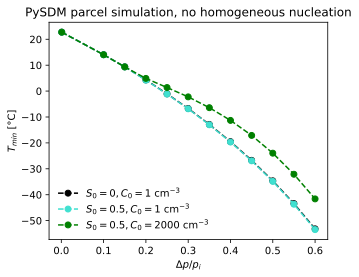

HTML(value="<a href='./Tmin_dp.pdf' target='_blank'>./Tmin_dp.pdf</a><br>")

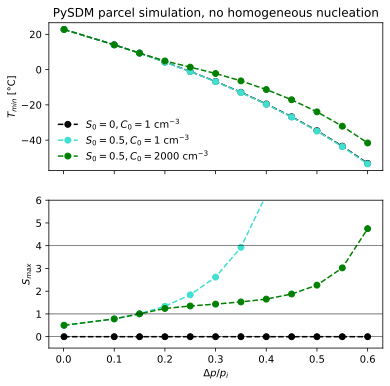

HTML(value="<a href='./dp_sweep.pdf' target='_blank'>./dp_sweep.pdf</a><br>")

In [6]:
fig,ax = pyplot.subplots(1,1,figsize=(5,4))
ax.plot(dp/p0, Tmin_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_xlabel(r"$\Delta p / p_i$")
ax.set_ylabel(r"$T_{min}$ [°C]")
ax.legend(loc=3, frameon=False)
ax.set_title("PySDM parcel simulation, no homogeneous nucleation")
show_plot("Tmin_dp.pdf")

#########

fig,axes = pyplot.subplots(2,1,figsize=(6,6),sharex=True)

ax = axes[0]
ax.plot(dp/p0, Tmin_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Tmin, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_ylabel(r"$T_{min}$ [°C]")
ax.legend(loc=3, frameon=False)
ax.set_title("PySDM parcel simulation, no homogeneous nucleation")

ax = axes[1]
ax.plot(dp/p0, Smax_dry, color="black", marker="o", ls="--", label="$S_0 = 0, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Smax_clean, color="turquoise", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 1 $ cm$^{-3}$")
ax.plot(dp/p0, Smax, color="green", marker="o", ls="--", label="$S_0 = 0.5, C_0 = 2000$ cm$^{-3}$")
ax.set_xlabel(r"$\Delta p / p_i$")
ax.set_ylabel(r"$S_{max}$")
# ax.set_yscale("log")
ax.set_ylim(-0.5,6)
ax.axhline(0, color="k", lw=0.5)
ax.axhline(1, color="k", lw=0.5)
ax.axhline(4, color="k", lw=0.5)

show_plot("dp_sweep.pdf")